In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Function to implement cross validation
def implement_cross_validation_KNN(k,X,y,mean_error,std_error):
    from sklearn.neighbors import KNeighborsRegressor
    model = KNeighborsRegressor(n_neighbors=k,weights='uniform')
    temp=[]
     # implementing k-fold cross validation
    from sklearn.model_selection import KFold
    kf = KFold(n_splits=10)
    for train, test in kf.split(X):
        model.fit(X[train], y[train])
        ypred = model.predict(X[test])
        from sklearn.metrics import mean_squared_error
        temp.append(mean_squared_error(y[test],ypred))
    #Calculating mean, variance and standard deviation for RMSE    
    mean_error.append(np.array(temp).mean())
    std_error.append(np.array(temp).std())
    return model,mean_error,std_error

In [3]:
#Function to implement kNN
def implement_KNN(k,X,y):
    from sklearn.neighbors import KNeighborsRegressor
    model = KNeighborsRegressor(n_neighbors=k,weights='uniform')
    model.fit(X,y)
    return model

In [4]:
#Function to plot errorbar 
def plot_errorbar(ax,k,mean_error,std_error):
    ax.errorbar(k,mean_error,yerr=std_error,linewidth=3)
    ax.set_xlabel("kNeighbors", fontsize=18) 
    ax.set_ylabel("Mean Square Error", fontsize=18)
    ax.set_title("Errorbar Plot for KNN Regressor varying KNeigbours")
    return ax

In [5]:
#Function to plot plot training and predicted data
def plot_data_models(X,y,ax,data):
    if data=="Actual":
        ax.scatter(X,y, marker='x',c='black',s=100,label="Actual Data")
    else:
        ax.scatter(X,y,marker='*',c='red',s=50,label="Predicted Data")
    ax.set_xlabel("X(Air Temparature)", fontsize=18) 
    ax.set_ylabel("Y(Relative Humidity)", fontsize=18)
    ax.set_title("Prediction and Actual Data",fontsize=18)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    return ax

In [6]:
#Function to manage legends     
def manage_legends(fig):
    handles, labels = fig.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles)) 
    fig.legend(by_label.values(),by_label.keys(),bbox_to_anchor=(0.85, 0.85),loc=1,prop={'size':14})

In [7]:
#Main Function

#Defining penalty values and plot variables
k = [1,2,3,5,10,15]
mean_error=[]; std_error=[]

In [8]:
# Read the data from Train data file
df = pd.read_csv("ProcessedWeatherData_mean.csv")
print(df)

      station_id  AtmosphericPressure  WindDirection  WindSpeed       Gust  \
0             M3               1011.4          270.0  18.000000  25.000000   
1             M6               1023.3          190.0  11.000000  14.000000   
2             M4               1033.2          200.0  19.000000  23.000000   
3             M6               1012.5          300.0  13.000000  20.000000   
4             M6               1011.0          190.0  13.000000  18.000000   
...          ...                  ...            ...        ...        ...   
87978         M5               1017.6          220.0  19.000000  25.000000   
87979         M5               1030.6          100.0   7.000000  12.000000   
87980         M6               1011.2          250.0  19.000000  31.000000   
87981         M6                995.0          150.0  15.438779  22.341194   
87982         M5               1000.2          240.0  26.000000  35.000000   

       WaveHeight  WavePeriod  AirTemperature  DewPoint  SeaTem

In [9]:
# Selecting relevant colums after feature selection
df.drop(columns=["station_id"],inplace = True)
print(df)

       AtmosphericPressure  WindDirection  WindSpeed       Gust  WaveHeight  \
0                   1011.4          270.0  18.000000  25.000000    2.000000   
1                   1023.3          190.0  11.000000  14.000000    0.900000   
2                   1033.2          200.0  19.000000  23.000000    2.699009   
3                   1012.5          300.0  13.000000  20.000000    2.700000   
4                   1011.0          190.0  13.000000  18.000000    2.000000   
...                    ...            ...        ...        ...         ...   
87978               1017.6          220.0  19.000000  25.000000    2.200000   
87979               1030.6          100.0   7.000000  12.000000    0.800000   
87980               1011.2          250.0  19.000000  31.000000    6.000000   
87981                995.0          150.0  15.438779  22.341194    5.000000   
87982               1000.2          240.0  26.000000  35.000000    4.000000   

       WavePeriod  AirTemperature  DewPoint  SeaTem

In [10]:
# Normalising train data
from sklearn.preprocessing import MinMaxScaler
Scaler = MinMaxScaler()
df_stand = Scaler.fit_transform(df.values)

In [11]:
X_train = df_stand[:,:-1]
y_train = df_stand[:,-1]
print(y_train)

[0.77419355 0.72580645 0.62903226 ... 0.87096774 0.62903226 0.61290323]


In [12]:
import time
start_time = time.time()

In [13]:
# Iterations for each value of Neighbors
for j in range(len(k)):
    model,mean_error,std_error=implement_cross_validation_KNN(k[j],X_train,y_train,mean_error,std_error)

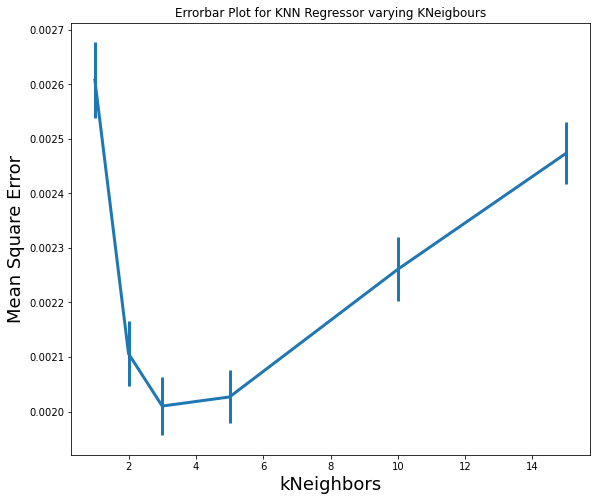

In [14]:
# Plotting cross validation plot
fig=plt.figure(1, figsize=(12, 8))
ax=fig.add_axes([0.1, 0.1, 0.6, 0.75])
ax=plot_errorbar(ax,k,mean_error,std_error) 

In [15]:
end_time = time.time() - start_time
print(end_time)

53.459490060806274


In [16]:
# Read the test data from test data file
df_test = pd.read_csv("ProcessedWeatherDataTest_mean.csv")
print(df_test)

      station_id  AtmosphericPressure  WindDirection  WindSpeed       Gust  \
0             M6               1019.6     250.000000  15.438779  22.341194   
1             M6               1001.3     320.000000  25.000000  35.000000   
2             M6               1019.2     150.000000  15.438779  22.341194   
3             M2               1024.0      10.000000  16.000000  21.000000   
4             M4               1005.6     290.000000  19.000000  25.000000   
...          ...                  ...            ...        ...        ...   
21991         M6               1018.3     200.000000   3.000000   8.000000   
21992         M6               1010.0     140.000000  21.000000  31.000000   
21993         M4                992.2     206.315752  15.438779  22.341194   
21994         M5               1021.4     130.000000   9.000000  14.000000   
21995         M6               1015.7      20.000000  15.000000  25.000000   

       WaveHeight  WavePeriod  AirTemperature  DewPoint  SeaTem

In [17]:
# Selecting relevant columns
df_test.drop(columns=["station_id"],inplace = True)
df_test.isnull().values.any()

False

In [18]:
y_test = df_test['RelativeHumidity'].values

In [19]:
# Normalising test data 
df_test_stand = Scaler.transform(df_test.values)
print(df_test_stand)

[[0.803663   0.69444444 0.32848466 ... 0.53815261 0.31192661 0.64516129]
 [0.66959707 0.88888889 0.53191489 ... 0.53815261 0.28440367 0.64516129]
 [0.8007326  0.41666667 0.32848466 ... 0.68674699 0.63302752 0.69354839]
 ...
 [0.6029304  0.57309931 0.32848466 ... 0.26104418 0.24770642 0.48387097]
 [0.81684982 0.36111111 0.19148936 ... 0.75100402 0.5412844  0.82258065]
 [0.77509158 0.05555556 0.31914894 ... 0.40963855 0.27522936 0.56451613]]


In [20]:
X_test_scaled = df_test_stand[:,:-1]
print(X_test_scaled)

[[0.803663   0.69444444 0.32848466 ... 0.49431818 0.53815261 0.31192661]
 [0.66959707 0.88888889 0.53191489 ... 0.49431818 0.53815261 0.28440367]
 [0.8007326  0.41666667 0.32848466 ... 0.68181818 0.68674699 0.63302752]
 ...
 [0.6029304  0.57309931 0.32848466 ... 0.19886364 0.26104418 0.24770642]
 [0.81684982 0.36111111 0.19148936 ... 0.69318182 0.75100402 0.5412844 ]
 [0.77509158 0.05555556 0.31914894 ... 0.36931818 0.40963855 0.27522936]]


In [21]:
# Training the model with selected value of K-Neigbors
finalModel=implement_KNN(3,X_train,y_train)

In [22]:
# Prdicting relative humidity
y_pred=finalModel.predict(X_test_scaled)

In [23]:
# Denormalising test data
df_pred = pd.DataFrame(np.hstack((X_test_scaled,y_pred[:, None])))
df_pred_inv=Scaler.inverse_transform(df_pred)
y_pred_inv=df_pred_inv[:,-1]

In [24]:
# Calculate Mean Squared error
from sklearn.metrics import mean_squared_error
print("MSE: ",mean_squared_error(y_test,y_pred_inv))

MSE:  7.199819159039018


In [25]:
# # Calculate Maximum error
from sklearn.metrics import max_error
print("Maximum Error: ",max_error(y_test,y_pred_inv))

Maximum Error:  16.0


In [26]:
# Calculate Mean Absolute error
from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error: ",mean_absolute_error(y_test,y_pred_inv))

Mean Absolute Error:  1.9817391040795294


In [27]:
# Calculate oreR2 sc
from sklearn.metrics import r2_score
print("R2-Score: ",r2_score(y_test,y_pred_inv))

R2-Score:  0.9352411148227995


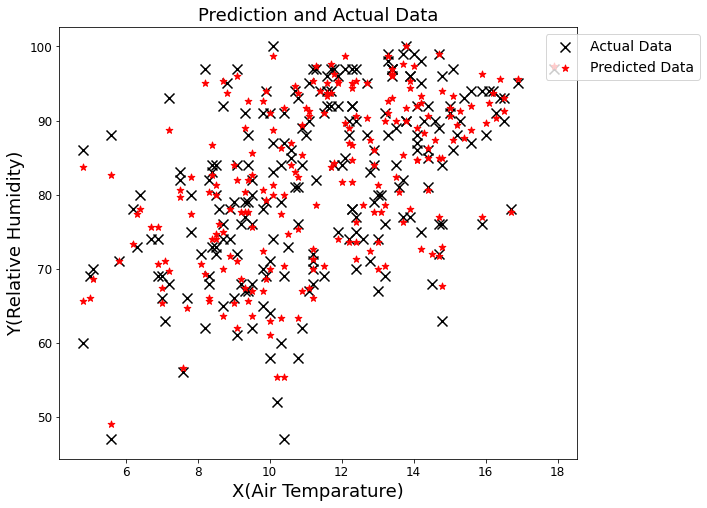

In [28]:
# Plotting Actual and Predicted Data
x_test_single_feature = df_test['AirTemperature'].values
fig=plt.figure(2, figsize=(12, 8))
ax=fig.add_axes([0.1, 0.1, 0.6, 0.75])
ax=plot_data_models(x_test_single_feature[::100],y_test[::100],ax,"Actual")
ax=plot_data_models(x_test_single_feature[::100],y_pred_inv[::100],ax,"Predicted")
manage_legends(fig)
plt.show()

Text(0.5, 1.0, 'Residual plot in KNN Regression')

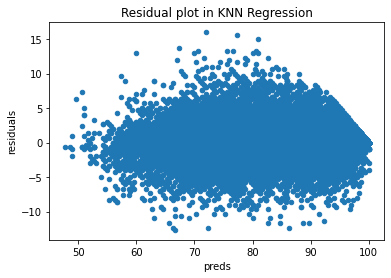

In [29]:
# Plotting Residual Plot
preds = pd.DataFrame({"preds":y_pred_inv, "true":y_test})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")
plt.title("Residual plot in KNN Regression")